In [ ]:
# 1️⃣ Installer kagglehub
!pip install kagglehub

# 2️⃣ Importer kagglehub et télécharger le dataset
import kagglehub

# Télécharger WeedCrop (Remplacez par le bon ID Kaggle si nécessaire)
path = kagglehub.dataset_download("imsparsh/deepweeds")

# 3️⃣ Afficher le chemin du dataset
print("📂 Chemin vers les fichiers du dataset :", path)


100%|██████████| 470M/470M [00:04<00:00, 98.9MB/s]


Extracting files...
📂 Chemin vers les fichiers du dataset : /root/.cache/kagglehub/datasets/imsparsh/deepweeds/versions/2


In [ ]:
import os
print(os.listdir(path))  # Liste les fichiers et dossiers dans le dataset


['labels', 'images']


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/imsparsh/deepweeds/versions/2"

print("📂 Contenu du dataset :", os.listdir(dataset_path))

📂 Contenu du dataset : ['labels', 'images']


In [ ]:
import os
import shutil
import pandas as pd

# Répertoires de base pour les images et les labels
images_dir = '/root/.cache/kagglehub/datasets/imsparsh/deepweeds/versions/2/images'  # Répertoire des images
labels_dir = '/root/.cache/kagglehub/datasets/imsparsh/deepweeds/versions/2/labels'  # Répertoire des labels

# Répertoires de destination pour train, test, et validation
base_dir = 'REP'  # Répertoire de sortie pour train, test, validation
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Fonction pour créer les répertoires si non existants
def create_directories():
    for directory in [train_dir, valid_dir, test_dir]:
        if not os.path.exists(directory):
            os.makedirs(directory)

    # Sous-répertoires weed et non-weed pour train, valid, test
    for directory in [train_dir, valid_dir, test_dir]:
        os.makedirs(os.path.join(directory, 'weed'), exist_ok=True)
        os.makedirs(os.path.join(directory, 'non-weed'), exist_ok=True)

# Fonction pour déplacer les images et labels vers leurs répertoires respectifs
def move_files(image_list, label_list, source_images_dir, target_dir):
    for image_name, label in zip(image_list, label_list):
        # Vérifier si l'image existe
        image_path = os.path.join(source_images_dir, image_name)
        if not os.path.exists(image_path):
            print(f"Image non trouvée: {image_name}. Ignorer cette image.")
            continue

        # Déterminer si l'image est "weed" ou "non-weed" en fonction du label
        if label in [1, 2, 3, 4, 5, 6, 7]:  # Classe "weed"
            target_subdir = 'weed'
        else:  # Classe "non-weed"
            target_subdir = 'non-weed'

        # Déplacer l'image vers le répertoire approprié
        shutil.copy(image_path, os.path.join(target_dir, target_subdir, image_name))
        print(f"Déplacé {image_name} vers {os.path.join(target_dir, target_subdir, image_name)}")

# Fonction pour traiter les fichiers CSV et déplacer les images et labels
def process_csv_files():
    # Liste des fichiers CSV
    csv_files = [
        'train_subset0.csv', 'train_subset1.csv', 'train_subset2.csv', 'train_subset3.csv', 'train_subset4.csv',
        'val_subset0.csv', 'val_subset1.csv', 'val_subset2.csv', 'val_subset3.csv', 'val_subset4.csv',
        'test_subset0.csv', 'test_subset1.csv', 'test_subset2.csv', 'test_subset3.csv', 'test_subset4.csv'
    ]

    # Parcourir tous les fichiers CSV et les traiter
    for csv_file in csv_files:
        csv_path = os.path.join(labels_dir, csv_file)

        if os.path.exists(csv_path):
            # Charger le fichier CSV
            df_labels = pd.read_csv(csv_path)

            # Afficher les colonnes pour vérifier
            print(f"Colonnes dans {csv_file}: {df_labels.columns}")

            # Extraire les images et les labels du fichier CSV
            images = df_labels['Filename'].tolist()  # Liste des images (modifié ici)
            labels = df_labels['Label'].tolist()  # Liste des labels (modifié ici)

            # Déterminer le répertoire de destination en fonction du préfixe du fichier CSV
            if 'train' in csv_file:
                target_dir = train_dir
            elif 'val' in csv_file:
                target_dir = valid_dir
            elif 'test' in csv_file:
                target_dir = test_dir
            else:
                continue  # Si le fichier ne correspond à aucune catégorie (train, val, test)

            # Déplacer les fichiers vers les répertoires correspondants
            move_files(images, labels, images_dir, target_dir)

# Créer les répertoires nécessaires
create_directories()

# Traiter les fichiers CSV et déplacer les images
process_csv_files()

print("Les images ont été séparées et déplacées dans les répertoires train, valid, et test.")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Déplacé 20171218-110443-2.jpg vers REP/test/non-weed/20171218-110443-2.jpg
Déplacé 20171218-110449-3.jpg vers REP/test/non-weed/20171218-110449-3.jpg
Déplacé 20171218-110528-3.jpg vers REP/test/non-weed/20171218-110528-3.jpg
Déplacé 20171218-110544-2.jpg vers REP/test/non-weed/20171218-110544-2.jpg
Déplacé 20171218-110553-3.jpg vers REP/test/non-weed/20171218-110553-3.jpg
Déplacé 20171218-110607-3.jpg vers REP/test/non-weed/20171218-110607-3.jpg
Déplacé 20171218-110628-2.jpg vers REP/test/non-weed/20171218-110628-2.jpg
Déplacé 20171218-110851-2.jpg vers REP/test/non-weed/20171218-110851-2.jpg
Déplacé 20171218-110905-2.jpg vers REP/test/non-weed/20171218-110905-2.jpg
Déplacé 20171218-111057-2.jpg vers REP/test/non-weed/20171218-111057-2.jpg
Déplacé 20171218-111140-3.jpg vers REP/test/non-weed/20171218-111140-3.jpg
Déplacé 20171218-111151-3.jpg vers REP/test/non-weed/20171218-111151-3.jpg
Déplacé 20171218-11120

In [ ]:
import os

# Répertoire principal
base_dir = 'REP'  # Remplacez par le répertoire de votre choix

# Fonction pour compter le nombre d'images dans chaque sous-répertoire
def count_images_in_subdirectories(base_dir):
    # Dictionnaire pour stocker les comptes d'images
    image_counts = {}

    # Parcourir les répertoires train, valid, test
    for split in ['train', 'valid', 'test']:
        split_dir = os.path.join(base_dir, split)

        # Vérifier si le répertoire existe
        if os.path.exists(split_dir):
            # Parcourir les sous-répertoires (weed, non-weed)
            for label in ['weed', 'non-weed']:
                label_dir = os.path.join(split_dir, label)

                # Vérifier si le répertoire existe
                if os.path.exists(label_dir):
                    # Compter les images dans ce sous-répertoire
                    image_count = len([f for f in os.listdir(label_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
                    image_counts[f'{split}/{label}'] = image_count

    return image_counts

# Compter les images dans les sous-répertoires de REP
image_counts = count_images_in_subdirectories(base_dir)

# Afficher les résultats
for directory, count in image_counts.items():
    print(f"{directory}: {count} images")


train/weed: 7251 images
train/non-weed: 10192 images
valid/weed: 4956 images
valid/non-weed: 6985 images
test/weed: 7277 images
test/non-weed: 10232 images


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# 1. Transformations avec data augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),   # Ajout: flip aléatoire
    transforms.RandomRotation(10),       # Ajout: rotation aléatoire
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# 2. Chargement des datasets
train_dataset = datasets.ImageFolder('REP/train', transform=transform)
valid_dataset = datasets.ImageFolder('REP/valid', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# 3. Chargement du modèle ResNet50 pré-entraîné
model = models.resnet50(pretrained=True)

# 4. Geler les couches de base
for param in model.parameters():
    param.requires_grad = False

# 5. Remplacer la couche finale
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 1),
    nn.Sigmoid()
)

# 6. Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# 7. Fonction de perte et optimiseur avec L2 regularization (weight decay)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0001, weight_decay=1e-4)  # ← L2 ici

# 8. Early stopping
patience = 5
best_val_loss = float('inf')
epochs_no_improve = 0

# 9. Boucle d'entraînement
num_epochs = 50
for epoch in range(num_epochs):
    # --- Phase entraînement ---
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = (outputs > 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total

    # --- Phase validation ---
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels.float())

            val_loss += loss.item()
            preds = (outputs > 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(valid_loader)
    val_acc = 100 * correct / total

    # --- Affichage ---
    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

    # --- Early stopping ---
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_modelRes.pth')
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= patience:
        print("Early stopping triggered.")
        break

# Charger le meilleur modèle
model.load_state_dict(torch.load('best_modelRes.pth'))

# Sauvegarde finale
torch.save(model.state_dict(), 'final_resnet50_l2_augmented.pth')


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]


Epoch 1 | Train Loss: 0.5248, Acc: 73.54% | Val Loss: 0.4550, Acc: 78.64%
Epoch 2 | Train Loss: 0.4789, Acc: 76.58% | Val Loss: 0.4603, Acc: 77.09%
Epoch 3 | Train Loss: 0.4573, Acc: 78.30% | Val Loss: 0.4195, Acc: 80.91%
Epoch 4 | Train Loss: 0.4419, Acc: 78.87% | Val Loss: 0.4027, Acc: 81.44%
Epoch 5 | Train Loss: 0.4305, Acc: 79.80% | Val Loss: 0.4127, Acc: 80.96%
Epoch 6 | Train Loss: 0.4199, Acc: 80.67% | Val Loss: 0.3735, Acc: 83.49%
Epoch 7 | Train Loss: 0.4113, Acc: 80.96% | Val Loss: 0.3672, Acc: 83.76%
Epoch 8 | Train Loss: 0.3964, Acc: 81.87% | Val Loss: 0.3688, Acc: 83.79%
Epoch 9 | Train Loss: 0.3864, Acc: 82.30% | Val Loss: 0.3562, Acc: 84.61%
Epoch 10 | Train Loss: 0.3696, Acc: 83.49% | Val Loss: 0.3274, Acc: 85.96%
Epoch 11 | Train Loss: 0.3712, Acc: 83.34% | Val Loss: 0.3326, Acc: 85.68%
Epoch 12 | Train Loss: 0.3568, Acc: 84.02% | Val Loss: 0.3213, Acc: 85.87%
Epoch 13 | Train Loss: 0.3522, Acc: 84.11% | Val Loss: 0.3129, Acc: 86.77%
Epoch 14 | Train Loss: 0.3496, Acc

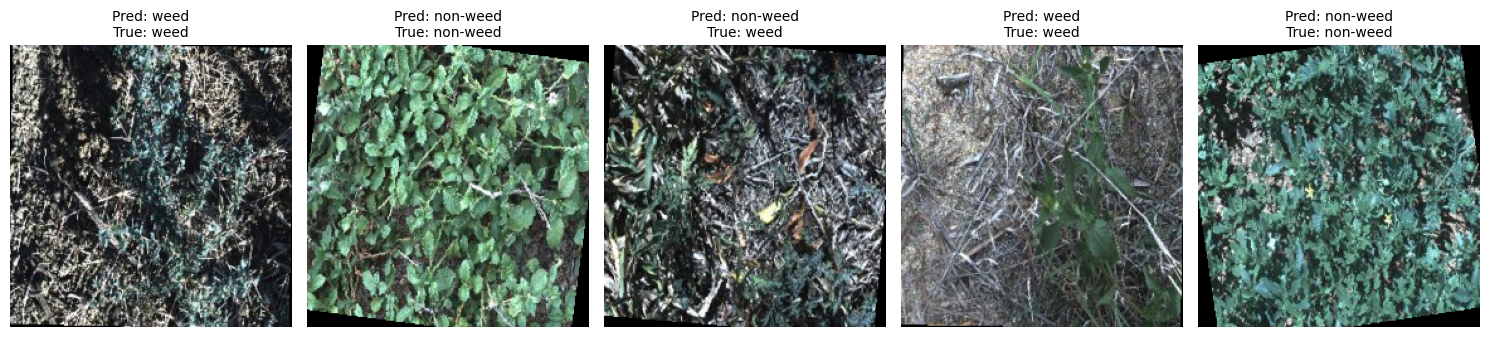

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Afficher quelques images avec prédictions
test_dataset = datasets.ImageFolder('REP/test', transform=transform)
classes = test_dataset.classes
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

def imshow(inp, title=None):
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean  # unnormalize
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.axis('off')

# Afficher 5 images test + prédictions
data_iter = iter(test_loader)
images, labels = next(data_iter)
images, labels = images.to(device), labels.to(device)
outputs = model(images).squeeze()
preds = (outputs > 0.5).long()

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    imshow(images[i])
    pred_class = classes[preds[i]]
    true_class = classes[labels[i]]
    plt.title(f"Pred: {pred_class}\nTrue: {true_class}", fontsize=10)
plt.tight_layout()
plt.show()


Using device: cuda
Epoch 1 | Train Loss: 0.6838, Acc: 59.42% | Val Loss: 0.6355, Acc: 64.69%
Epoch 2 | Train Loss: 0.5811, Acc: 68.29% | Val Loss: 0.5757, Acc: 70.11%
Epoch 3 | Train Loss: 0.5285, Acc: 72.13% | Val Loss: 0.5038, Acc: 74.65%
Epoch 4 | Train Loss: 0.5079, Acc: 73.43% | Val Loss: 0.4999, Acc: 73.63%
Epoch 5 | Train Loss: 0.4915, Acc: 74.54% | Val Loss: 0.4524, Acc: 77.06%
Epoch 6 | Train Loss: 0.4644, Acc: 76.24% | Val Loss: 0.4416, Acc: 77.67%
Epoch 7 | Train Loss: 0.4660, Acc: 76.47% | Val Loss: 0.4251, Acc: 78.30%
Epoch 8 | Train Loss: 0.4424, Acc: 78.03% | Val Loss: 0.3941, Acc: 81.66%
Epoch 9 | Train Loss: 0.4247, Acc: 78.93% | Val Loss: 0.4249, Acc: 79.13%
Epoch 10 | Train Loss: 0.4079, Acc: 79.85% | Val Loss: 0.3617, Acc: 82.38%
Epoch 11 | Train Loss: 0.3975, Acc: 81.02% | Val Loss: 0.3882, Acc: 81.29%
Epoch 12 | Train Loss: 0.3834, Acc: 81.55% | Val Loss: 0.3437, Acc: 85.70%
Epoch 13 | Train Loss: 0.3697, Acc: 82.39% | Val Loss: 0.2924, Acc: 87.87%
Epoch 14 | Trai

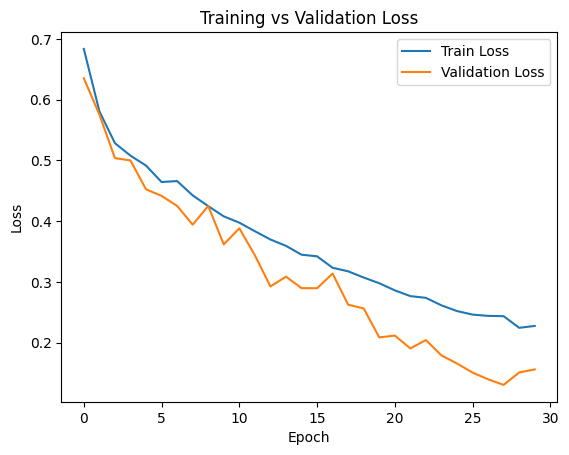

In [ ]:

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import copy
import matplotlib.pyplot as plt

# Vérification de CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Transforms pour images 256x256
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Chargement du dataset
def load_data(base_dir, transform):
    data = {}
    for split in ['train', 'valid']:
        data[split] = datasets.ImageFolder(os.path.join(base_dir, split), transform=transform)
    return data

base_dir = 'REP'
data = load_data(base_dir, transform)

train_loader = DataLoader(data['train'], batch_size=32, shuffle=True)
val_loader = DataLoader(data['valid'], batch_size=32, shuffle=False)

# Définition du modèle CNN avec Dropout
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.3),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.4),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 32 * 32, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)  # 2 classes : weed / non-weed
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Initialisation
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization

# Callback: Early stopping
class EarlyStopping:
    def __init__(self, patience=5):
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = None

    def __call__(self, val_loss, model):
        if self.best_loss is None or val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
            self.best_model = copy.deepcopy(model.state_dict())
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

# Entraînement
early_stopper = EarlyStopping(patience=5)

train_losses = []
val_losses = []

for epoch in range(30):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_running_loss = 0.0
    val_correct, val_total = 0, 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader)
    val_acc = 100 * val_correct / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Acc: {val_acc:.2f}%")

    early_stopper(val_loss, model)

    if early_stopper.early_stop:
        print("Early stopping triggered.")
        break

# Charger le meilleur modèle
model.load_state_dict(early_stopper.best_model)
torch.save(model.state_dict(), "best_model.pth")
print("Best model saved as best_model.pth")

# Affichage des courbes
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.show()
